In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, GRU, Flatten, LSTM, Input, TimeDistributed, Dropout,BatchNormalization
from keras.layers import Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [15]:
dataset = pd.read_csv('data.csv')
y = dataset['Diagnosis'] # Dedendent Variable
x = dataset.drop(['ID ','Diagnosis'], axis = 1) # Independent Variable
dataset.iloc[:,1] = LabelEncoder().fit_transform(dataset.iloc[:,1].values)

In [16]:
# Spliting the data into 75% training and 25% test

X = dataset.iloc[:,2:32].values
Y = dataset.iloc[:,1].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0) # 75% Training 25% test

In [17]:
# Scaling the data

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(x_train.shape,x_test.shape)

(426, 30) (143, 30)


In [18]:
#Reshaping the data

x_train, x_test = x_train.reshape(426,30,1), x_test.reshape(143,30,1)
print(x_train.shape,x_test.shape)

(426, 30, 1) (143, 30, 1)


In [19]:
epochs = 50
model = Sequential()
model.add(GRU(30, activation='tanh',recurrent_activation = 'sigmoid', input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#model.add(GRU(29, activation='tanh',recurrent_activation = 'sigmoid',input_shape=(29,1) ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 30)                2970      
                                                                 
 batch_normalization_2 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 30)                0         
                                                                 
 flatten_1 (Flatten)         (None, 30)               

In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(x_train, y_train, epochs = epochs, validation_data=(x_test, y_test), batch_size = 64)

Epoch 1/50
7/7 [==============================] - 2s 65ms/step - loss: 0.8711 - accuracy: 0.5469 - val_loss: 0.6812 - val_accuracy: 0.7902
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6692 - accuracy: 0.7042 - val_loss: 0.6509 - val_accuracy: 0.7902
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.5439 - accuracy: 0.7465 - val_loss: 0.6246 - val_accuracy: 0.7902
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4922 - accuracy: 0.7606 - val_loss: 0.6025 - val_accuracy: 0.8042
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4749 - accuracy: 0.8146 - val_loss: 0.5821 - val_accuracy: 0.8182
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4115 - accuracy: 0.8521 - val_loss: 0.5632 - val_accuracy: 0.8322
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.3962 - accuracy: 0.8638 - val_loss: 0.5444 - val_accuracy: 0.8392
Epoch 8/50
7/7 [=============

In [22]:
#Plot training & validation accuracy values 
def plot_learningCurve(history, epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc='upper left')
    plt.show()
    
    #Plot training and validation loss 

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc='upper left')
    plt.show()

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

3/3 - 0s - loss: 0.1652 - accuracy: 0.9161 - 20ms/epoch - 7ms/step


[0.16524256765842438, 0.9160839319229126]

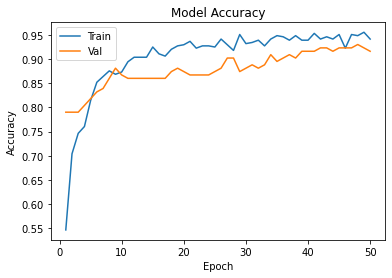

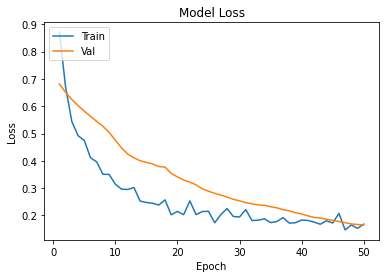

In [25]:
plot_learningCurve(history, epochs)

In [26]:
import innvestigate

modell = model

analyzer = innvestigate.create_analyzer("gradient", model)

AttributeError: module 'keras.utils' has no attribute 'Sequence'

3.9.7
